# Test 02: Supervised and Unsupervised Learning

The following imports may be useful for Test 02, and should be sufficient to finish the
questions.  However, if you would like to import additional functions or objects, you may
do so, though they need to come from `scikit-learn` library, or other functions from basic
libraries like `numpy`, `matplotlib` or` pandas`.

You need to get the questions from our class MyLeoOnline site by starting Test 02.  You should be given 2 multi-part questions.

Please make sure that the notebook that you submit for grading runs all cells cleanly from top to bottom if a **Run -> Run All Cells** is performed.  Please give your name and CWID in the provided fields
below to enusre your test work is properly attributed.  As a reminder, all tests and assignment work for this class is individual work unless otherwise noted.  You may not work with
others, not use past students works or answers created by others for these test questions.

**Due: Thursday 12/14/2022 @ 12:30 afternoon**

Name: Anas Mohammad

CWID: 50322515


In [85]:
# Basic imports that are generally useful
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import sklearn
import seaborn as sbn

# imports specific to these test questions.  Please pur all imports you add for your work here
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [86]:
# notebook wide options to improve look of basic matplotlib figures and numpy output
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in
np.set_printoptions(suppress=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot
plt.style.use('seaborn-darkgrid')

/var/folders/yy/jqy_jm692_b9mptx4ynxsbtc0000gn/T/ipykernel_13378/1661100647.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


## Question 1: Supervised Learning (65 pts)

Start Test 02 in MyLeoOnline to get the test questions you need to answer.  You will need
to use the `wine.csv` data file for the Test 02 questions.  This file is in the `data`
subdirectory already.  Make sure that you load it using a relative path name as has been
required for our assignments, e.g. it should be in `../data/wine.csv` relative to where you are
running your Test 02 notebook.

In [87]:
# load file into a dataframe here
import pandas as pd
data=pd.read_csv('data/wine.csv', sep=";")
data.shape

(4898, 12)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [89]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [90]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [91]:
distinct_levels = data['quality'].unique()

In [92]:
distinct_levels

array([6, 5, 7, 8, 4, 3, 9])

In [93]:
## 1.2: Data Exploration and Visualization
correlation_matrix = data.corr()

In [94]:
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [95]:
most_corr_features = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

In [96]:
most_corr_features = most_corr_features[:2].index.tolist()

In [97]:
most_corr_features

[('fixed acidity', 'fixed acidity'), ('density', 'residual sugar')]

In [98]:
X = data.loc[:,['density']]
y = data.loc [:,['residual sugar']]

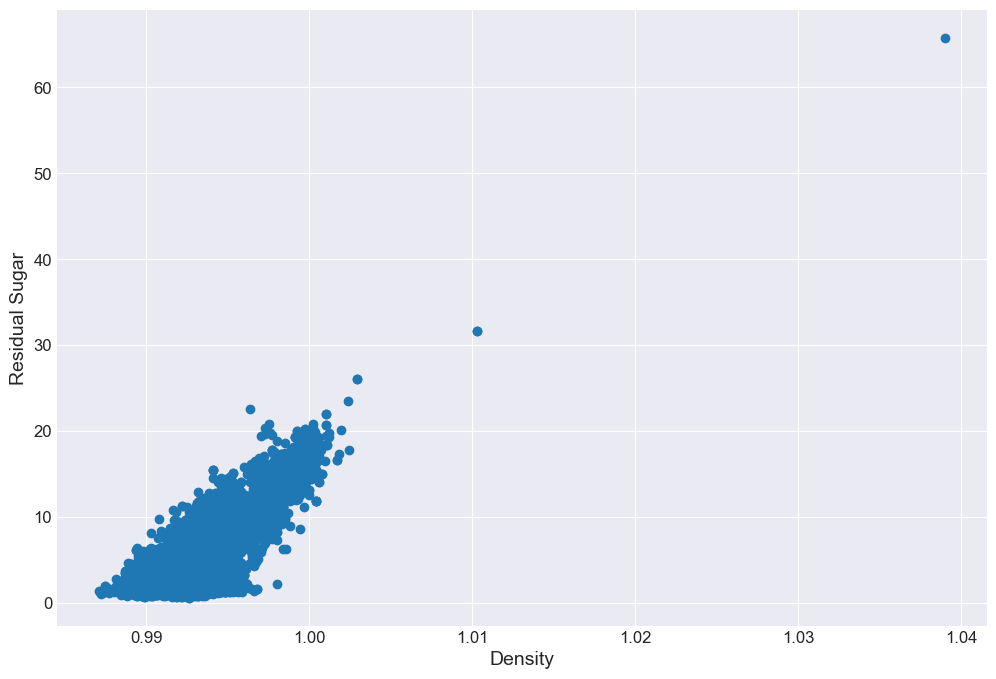

In [99]:
plt.scatter (X,y);
plt.xlabel("Density");
plt.ylabel("Residual Sugar");

In [100]:
from sklearn.linear_model import LinearRegression


In [101]:

model = LinearRegression().fit(X,y)

In [102]:
y_predict = model.predict(X)


In [103]:
X

,density
0,1.00100
1,0.99400
2,0.99510
3,0.99560
4,0.99560
...,...
4893,0.99114
4894,0.99490
4895,0.99254
4896,0.98869


In [104]:
X = X.to_numpy()
y = y.to_numpy()

In [105]:
X = X[:,0]
y = y[:,0]

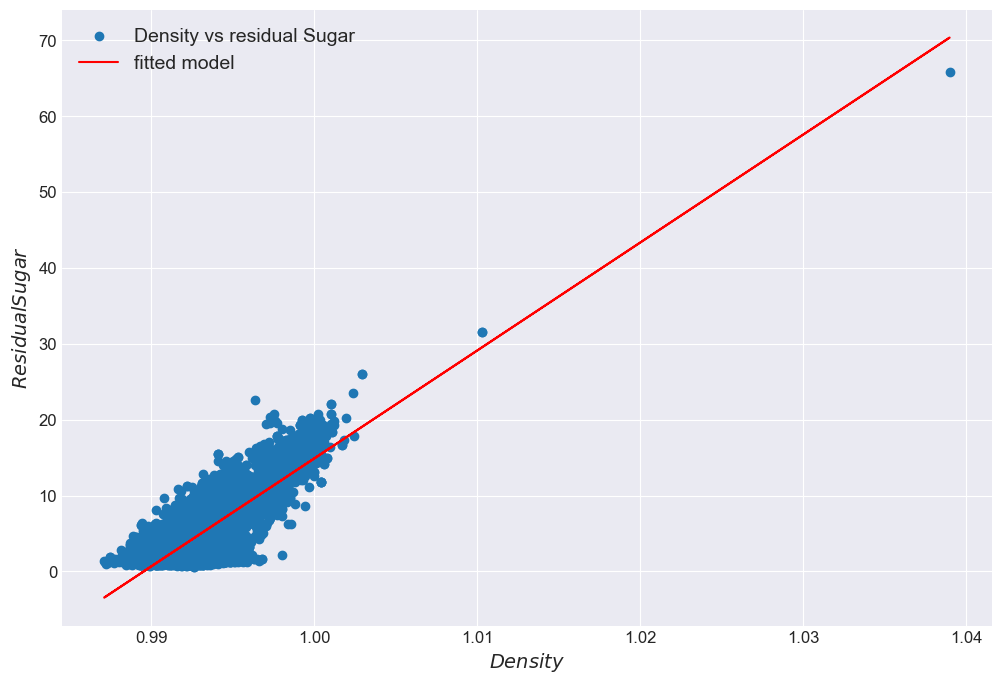

In [106]:
plt.scatter (X, y);
plt.xlabel("$Density$")
plt.ylabel("$Residual Sugar$")
(m,b) = np.polyfit(X, y_predict, 1)
plt.plot(X, m*X+b, color="red")
plt.legend(["Density vs residual Sugar ", "fitted model"]);

In [107]:
#1.3 Data Preparation

In [108]:
X = data.loc[:, data.columns!='quality']

In [109]:
y = data.loc[:,['quality']]

In [110]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [111]:
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [112]:
X.shape

(4898, 11)

In [113]:
y.shape

(4898, 1)

In [114]:
print("Values Before Scaling:")
print("Min values:\n\n", X.min())
print("Max values:\n\n", X.max())
print("Mean values:\n\n", X.mean())

Values Before Scaling:
Min values:

 fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     2.00000
total sulfur dioxide    9.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
dtype: float64
Max values:

 fixed acidity            14.20000
volatile acidity          1.10000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.34600
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        3.82000
sulphates                 1.08000
alcohol                  14.20000
dtype: float64
Mean values:

 fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
fre

In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

In [116]:
print("\n Values After Scaling:")
print("Min values:\n", X_train_scaled.min(axis=0))
print("Max values:\n", X_train_scaled.max(axis=0))
print("Mean values:\n", X_train_scaled.mean(axis=0))


 Values After Scaling:
Min values:
 [-3.62035144 -1.96698494 -2.76174325 -1.14194404 -1.68327372 -1.95867682
 -3.04422957 -2.31303846 -3.10140787 -2.36470935 -2.04329735]
Max values:
 [ 8.70510587  8.15364317 10.95642044 11.71411154 13.74307649 14.9183141
  7.09844419 15.03129798  4.18407517  5.17160188  2.99532557]
Mean values:
 [-0.  0.  0. -0.  0. -0. -0.  0. -0. -0. -0.]


array([[<Axes: title={'center': 'quality'}>]], dtype=object)

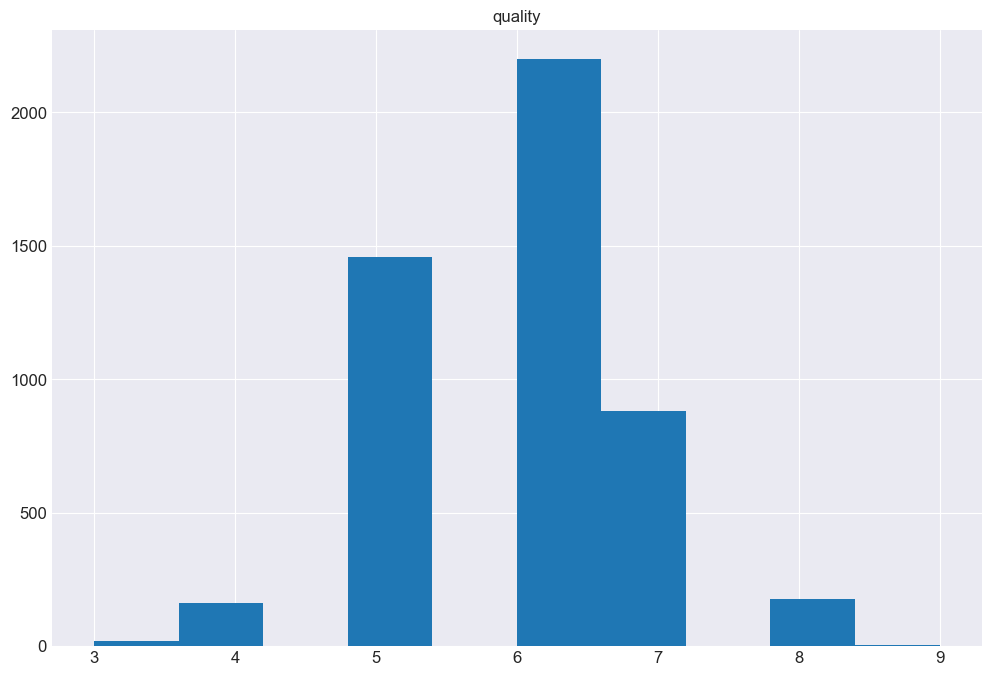

In [117]:
y.hist()

In [118]:
stratified_split = StratifiedShuffleSplit(test_size=0.2)


In [119]:
# Performing the stratified shuffle and split
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Display the distribution of labels in the training and test sets
print("Distribution of labels in the training set:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of labels in the test set:")
print(y_test.value_counts(normalize=True))

Distribution of labels in the training set:
quality
6          0.448698
5          0.297601
7          0.179684
8          0.035733
4          0.033180
3          0.004084
9          0.001021
dtype: float64

Distribution of labels in the test set:
quality
6          0.448980
5          0.296939
7          0.179592
8          0.035714
4          0.033673
3          0.004082
9          0.001020
dtype: float64


In [120]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3918, 11)
X_test shape: (980, 11)
y_train shape: (3918, 1)
y_test shape: (980, 1)


array([[<Axes: title={'center': 'quality'}>]], dtype=object)

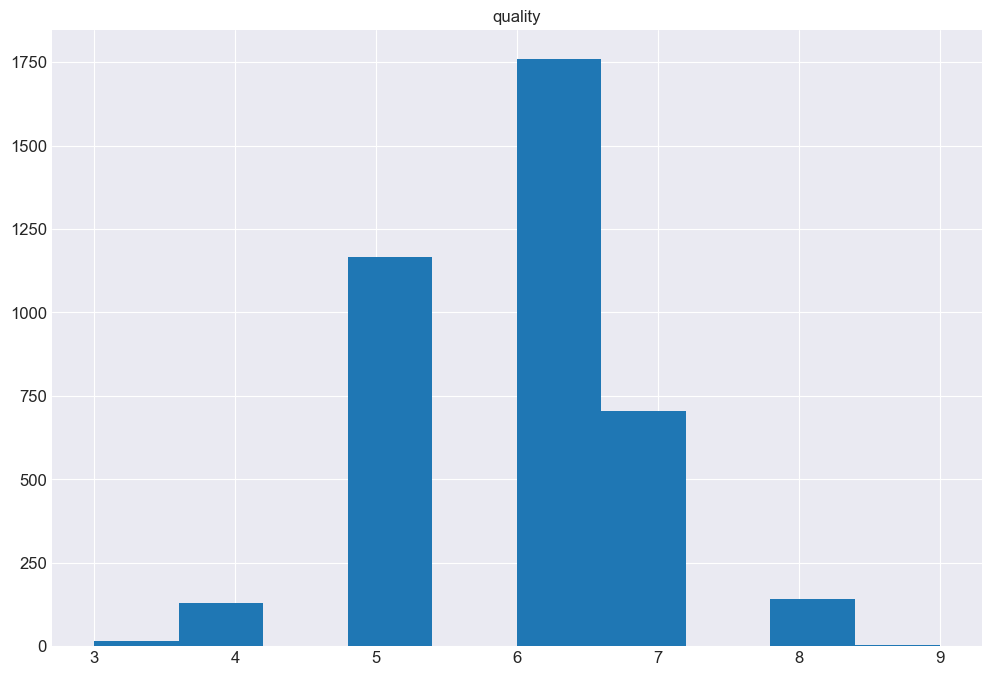

In [121]:
y_train.hist()

In [122]:
#1.4  Train and Evaluate Classification model

In [123]:
model = LogisticRegression(max_iter=100, random_state=42)

In [124]:
model.fit(X_train, y_train)

/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [125]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        33
           5       0.45      0.34      0.38       291
           6       0.48      0.82      0.60       440
           7       0.00      0.00      0.00       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.47       980
   macro avg       0.13      0.17      0.14       980
weighted avg       0.35      0.47      0.38       980

Confusion Matrix:
 [[  0   0   3   1   0   0   0]
 [  0   0  12  20   1   0   0]
 [  0   0  98 192   1   0   0]
 [  1   0  78 361   0   0   0]
 [  0   0  24 152   0   0   0]
 [  0   0   4  31   0   0   0]
 [  0   0   0   1   0   0   0]]


/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0) 

In [127]:
clf.fit(X_train, y_train)

/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(random_state=0)

In [44]:
pred=clf.predict(X_test)
print("The Raw accuracy:")
print(accuracy_score(y_true=y_test, y_pred=pred))
print ("Classification Report of Extra Trees Classifier")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

The Raw accuracy:
0.6877551020408164
Classification Report of Extra Trees Classifier
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.44      0.21      0.29        33
           5       0.72      0.69      0.70       291
           6       0.67      0.79      0.73       440
           7       0.69      0.59      0.63       176
           8       0.84      0.46      0.59        35
           9       0.00      0.00      0.00         1

    accuracy                           0.69       980
   macro avg       0.48      0.39      0.42       980
weighted avg       0.68      0.69      0.68       980

Confusion Report
[[  0   0   2   2   0   0   0]
 [  0   7  14  12   0   0   0]
 [  0   7 201  82   1   0   0]
 [  0   2  57 347  32   2   0]
 [  0   0   6  66 103   1   0]
 [  0   0   0   7  12  16   0]
 [  0   0   0   0   1   0   0]]


/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
#Yes using the Extra tree classifier improved the accuracy from 0.49 to 0.66

## Question 2: Unsupervised Learning (35 pts)

In [67]:
pca = PCA()
    

In [68]:
X_pca = pca.fit_transform(X)


In [69]:
X.shape

(4898, 11)

In [70]:
X_pca.shape

(4898, 11)

In [71]:
print(pca.components_)

[[ 0.0015444   0.000169    0.00033865  0.04732753  0.00009757  0.261877
   0.96385764  0.00003597  0.00000338  0.0003409  -0.01250375]
 [-0.0091635  -0.00154547  0.00014031  0.01494318 -0.00007183  0.96468537
  -0.26273686 -0.00001836 -0.0000417  -0.00036111  0.0064552 ]
 [ 0.01290026  0.00092889  0.00125844  0.99519173  0.0000785  -0.02639318
  -0.04278881  0.0004469  -0.00701734 -0.00214205 -0.08272268]
 [-0.14765786  0.01545171 -0.00500453  0.08420048 -0.00657323 -0.00638111
   0.01061351 -0.00115166  0.01702714  0.00260091  0.98506297]
 [ 0.98496468 -0.00397808  0.04169217 -0.00080802 -0.00149779  0.00787469
  -0.00175277  0.00032844 -0.07550594 -0.00353826  0.14936118]
 [ 0.07341017 -0.10667477 -0.0166104   0.00603149 -0.01427825  0.0004473
  -0.00070021  0.00363445  0.92824307  0.34791023 -0.00496686]
 [-0.04866972 -0.32471498  0.86160259 -0.0001541   0.01293099 -0.00099474
   0.00003447  0.00008362 -0.15127424  0.35604038  0.00394284]
 [-0.00496313  0.16224336 -0.35232041 -0.000

In [72]:
print(pca.explained_variance_)


[1931.51331576  168.45289494   21.56099321    1.07442032    0.68670863
    0.01853188    0.01428981    0.0114461     0.00864205    0.00039606
    0.00000032]


In [73]:
S = np.diag(pca.singular_values_)

In [74]:
S.shape

(11, 11)

Text(0, 0.5, 'ratio of variance explained')

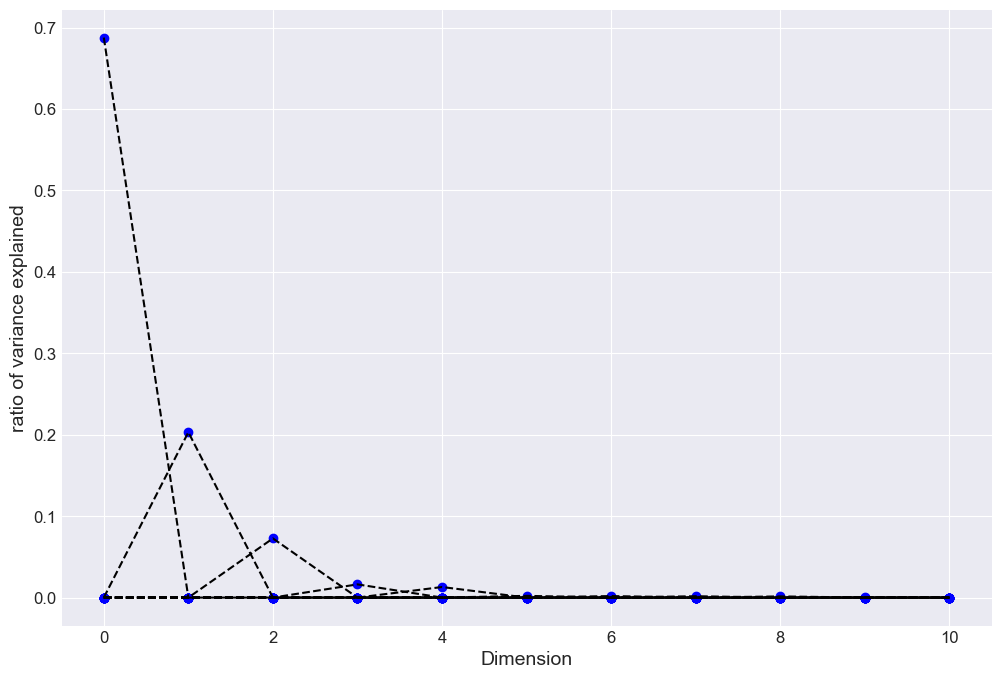

In [75]:
plt.figure()
plt.plot(range(11), S/np.sum(S), 'bo')
plt.plot(range(11), S/np.sum(S), 'k--')
plt.xlabel('Dimension')
plt.ylabel('ratio of variance explained')


In [76]:
pca = PCA(n_components=0.8)

In [77]:
X_std = StandardScaler().fit_transform(X)


In [78]:
X_pca2 = pca.fit_transform(X_std)


In [79]:
X_pca2.shape

(4898, 6)

In [80]:
split = StratifiedShuffleSplit(test_size=0.2)


In [81]:
for train_index, test_index in split.split(X_pca2, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [82]:
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=0) 

In [83]:
clf2.fit(X_train, y_train)

/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(random_state=0)

In [84]:
pred=clf2.predict(X_test)
print("The Raw accuracy:")
print(accuracy_score(y_true=y_test, y_pred=pred))
print ("Classification Report of Extra Trees Classifier")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

The Raw accuracy:
0.6724489795918367
Classification Report of Extra Trees Classifier
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.12      0.21        33
           5       0.73      0.65      0.69       291
           6       0.63      0.84      0.72       440
           7       0.72      0.48      0.58       176
           8       0.80      0.34      0.48        35
           9       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.51      0.35      0.38       980
weighted avg       0.68      0.67      0.66       980

Confusion Report
[[  0   0   2   2   0   0   0]
 [  1   4  16  12   0   0   0]
 [  0   2 189  98   2   0   0]
 [  0   0  47 370  23   0   0]
 [  0   0   5  84  84   3   0]
 [  0   0   0  17   6  12   0]
 [  0   0   0   0   1   0   0]]


/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
